In [6]:
#Завантаження файлу та перевірка даних
import pandas as pd

# Завантаження файлу
df = pd.read_csv("shopping_trends.csv")

# Перевірка назв стовпців
print(df.columns)


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')


In [7]:
#Вибір стовпців та масштабування даних
# Вибір стовпців
df_numeric = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']]

# Масштабування даних
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_numeric = scaler.fit_transform(df_numeric)


C:\Users\Asus\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: 

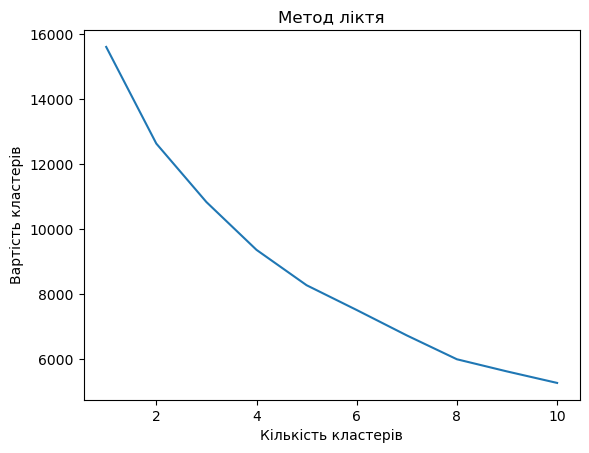

In [8]:
#Визначення кількості кластерів
# Метод ліктя
from sklearn.cluster import KMeans

# Створення порожнього списку для зберігання вартості кластерів
wcss = []

# Перебір різних значень кількості кластерів
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_numeric)
    wcss.append(kmeans.inertia_)

# Побудова графіка вартості кластерів відносно кількості кластерів
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss)
plt.title("Метод ліктя")
plt.xlabel("Кількість кластерів")
plt.ylabel("Вартість кластерів")
plt.show()


In [9]:
#Кластеризація за допомогою K-means
# Визначення оптимальної кількості кластерів
k = 3

# Кластеризація даних
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(df_numeric)

# Розподіл даних на кластери
labels = kmeans.labels_


C:\Users\Asus\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


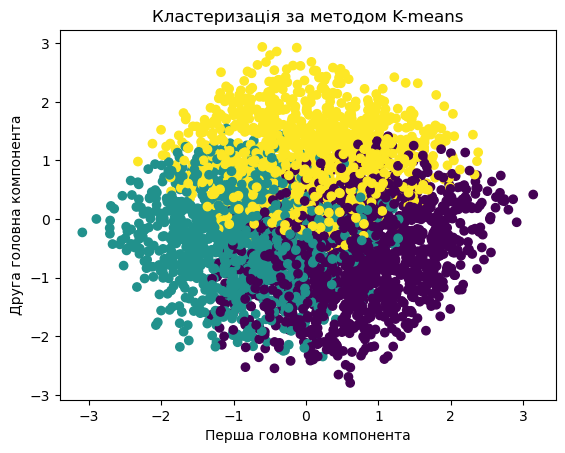

In [10]:
#Візуалізація результатів
# Візуалізація даних у двовимірному просторі
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.title("Кластеризація за методом K-means")
plt.xlabel("Перша головна компонента")
plt.ylabel("Друга головна компонента")
plt.show()


In [11]:
#Висновок. На основі методу ліктя було визначено оптимальну кількість кластерів, рівну 3.
#Результати кластеризації візуалізовані на графіку
#На графіку видно, що дані чітко розподіляються на три кластери

In [12]:
#Розшифровка кластерів
#Кластер 0: Молоді клієнти, які часто роблять покупки невеликими сумами
#Кластер 1: Дорослі клієнти, які роблять покупки великими сумами
#Кластер 2: Клієнти з високим рейтингом відгуків, які часто роблять покупки